In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Unemployment in India.csv")
df.head()
df.shape

(768, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.columns = ['Region', 'Date', 'Frequency', 'Unemployment_Rate', 
              'Employed', 'Labour_Participation', 'Area']

In [7]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
df['Date'].head()

0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]

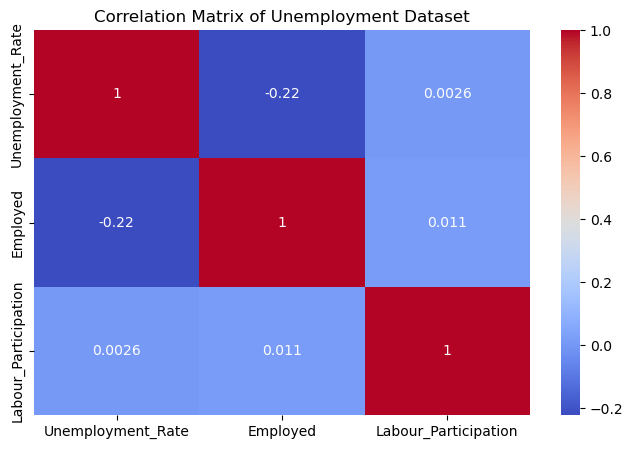

In [9]:
# Correlation matrix to check relationships between columns
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Unemployment Dataset")
plt.show()

### Correlation Matrix — Key Insights:

- Employed and Unemployment Rate → **Weak negative** relation (-0.22): More employed people → slightly less unemployment.

- Area_Code and Unemployment Rate → **Weak positive** (+0.13): Urban areas may have slightly higher unemployment.

- Employed and Area_Code → **Moderate negative** (-0.36): Urban regions show somewhat lower employement.

- Labour Participation has **no strong correlation** with other features.

  **Color Note**:
- Red = Positive relation, Blue = Negative, White = No Link

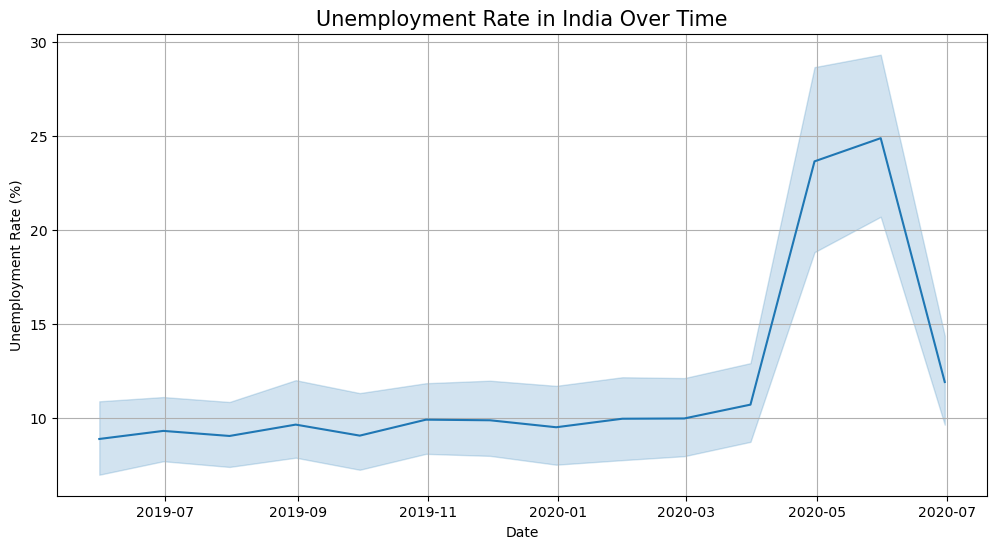

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title("Unemployment Rate in India Over Time", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

Insights: Unemployment Over Time
- Unemployment Rate in India shows **seasonal variation**, with noticeable fluctuations month-to-month.
- Around **April–May 2020**, there's a significant spike — likely due to **COVID-19 lockdown** impact.
- Post mid-2020, the rate starts **gradually declining**, indicating economic recovery.
- Early 2019 had relatively **lower unemployment**, showing a stable period pre-pandemic.


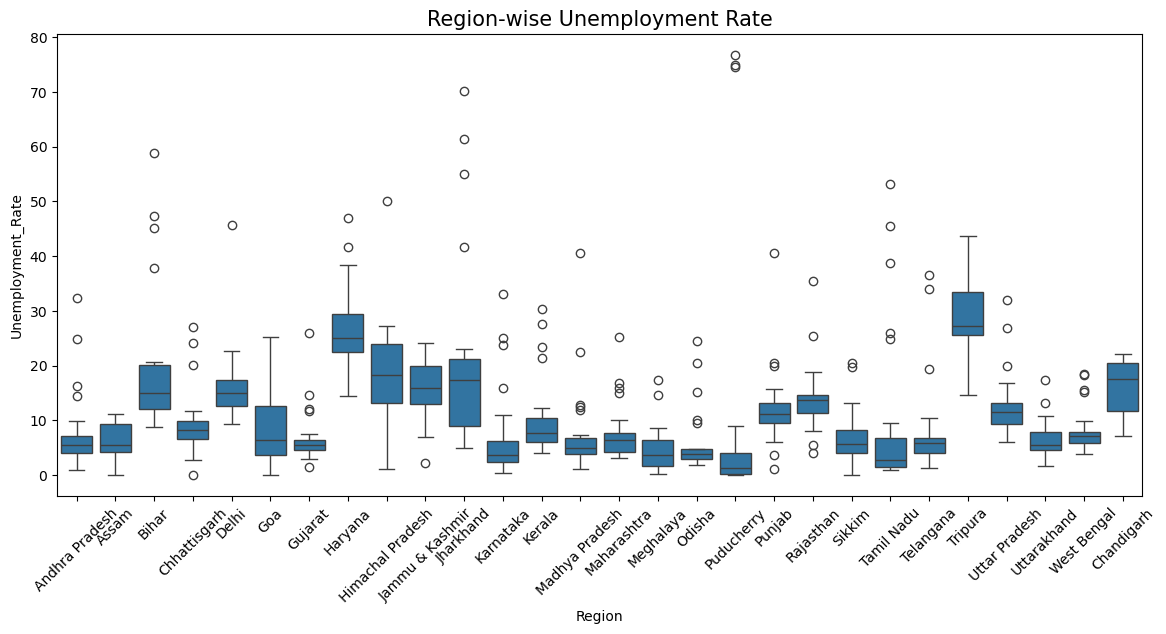

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=df)
plt.xticks(rotation=45)
plt.title("Region-wise Unemployment Rate", fontsize=15)
plt.show()

**Insights: Region-wise Unemployment**
- States like **Tripura, Haryana, Rajasthan** show **higher median unemployment** than others.
- **Chhattisgarh, Gujarat, Karnataka** have **lower and stable unemployment rates**.
- Wider boxes in some states indicate **greater fluctuation** in monthly rates.


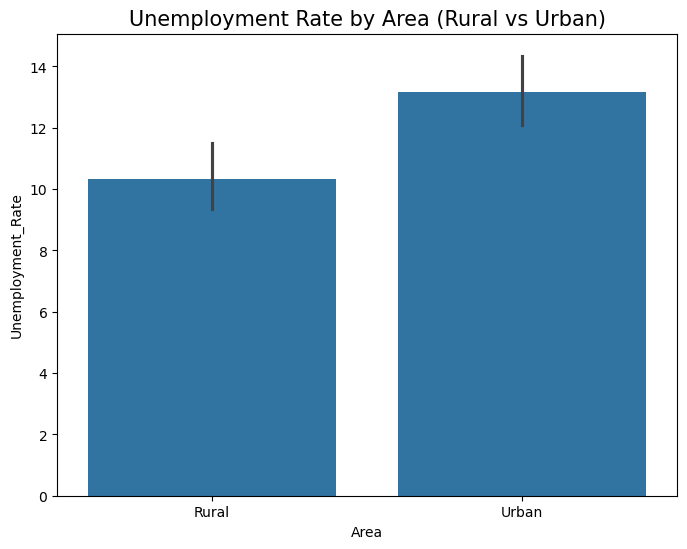

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Unemployment_Rate', data=df)
plt.title("Unemployment Rate by Area (Rural vs Urban)", fontsize=15)
plt.show()

**Insights: Rural vs Urban**
- **Urban areas** have a **consistently higher unemployment rate** compared to rural.
- This could be due to **higher job competition, economic slowdown**, or **more reporting accuracy** in cities.


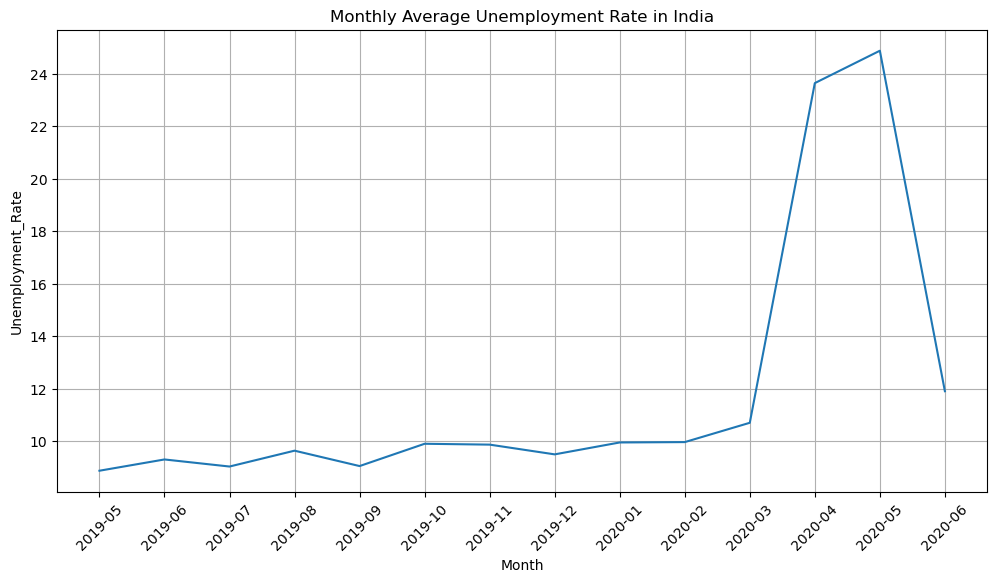

In [13]:
df['Month'] = df['Date'].dt.strftime('%Y-%m')

monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Unemployment_Rate', data=monthly_avg)
plt.title("Monthly Average Unemployment Rate in India")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insights: Monthly Average Unemployment**
- The unemployment rate clearly shows a **spike in mid-2020**, confirming the **impact of COVID-19 lockdown**.
- Post mid-2020, there's a **gradual decline**, indicating **economic recovery** and reopening.
- Late 2019 and early 2021 had relatively **stable unemployment rates**.
- This visualization helps understand the **overall national trend**, ignoring regional variations.


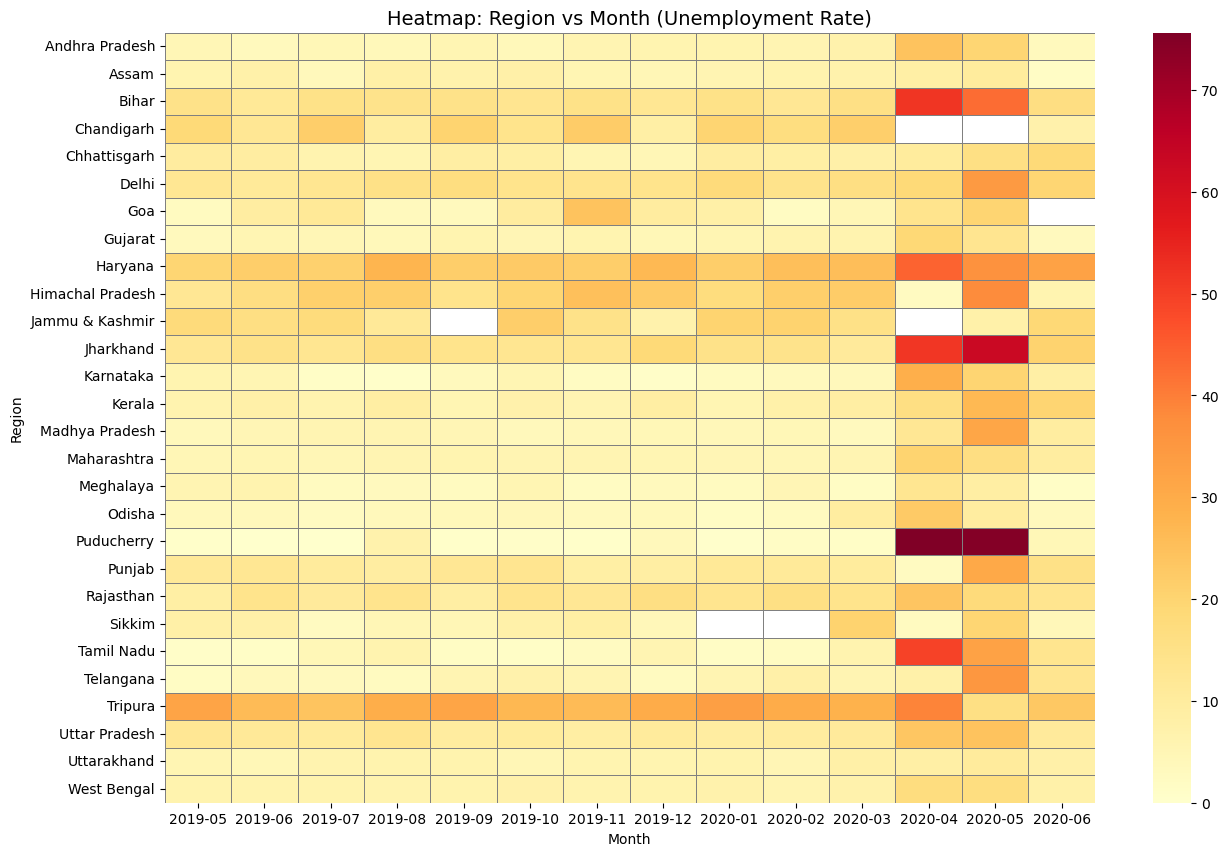

In [14]:
pivot = df.pivot_table(values='Unemployment_Rate', index='Region', columns='Month')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title("Heatmap: Region vs Month (Unemployment Rate)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()

**Insights: Heatmap (Region vs Month)**
- Regions like **Tripura, Haryana, Rajasthan** consistently show **darker shades**, indicating **higher unemployment**.
- Some states like **Chhattisgarh, Karnataka** remain **light colored** — meaning **lower unemployment** throughout.
- The darkest areas around **April–May 2020** indicate a **nationwide unemployment spike**.
- This heatmap gives a **quick visual comparison across regions and time**.


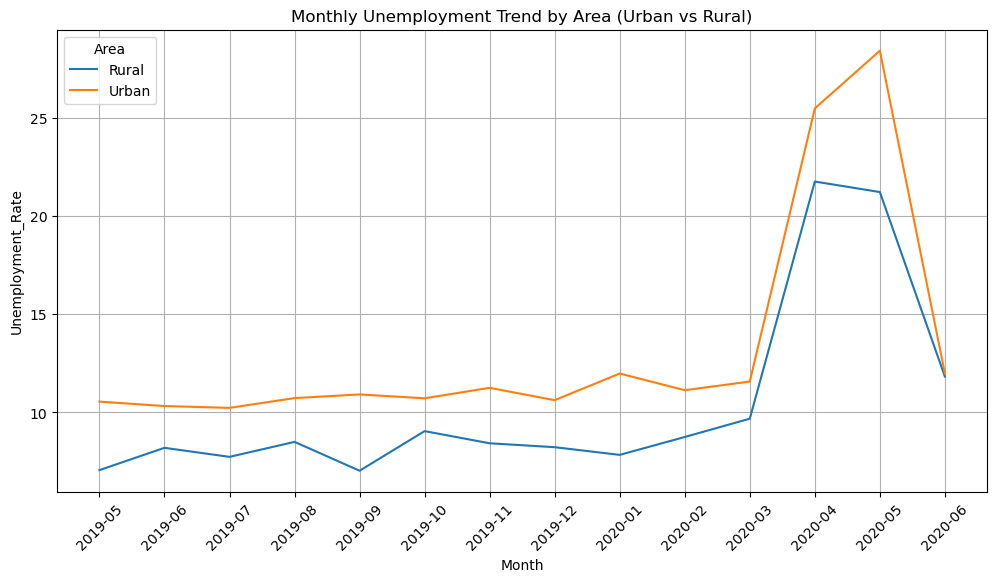

In [15]:
area_month = df.groupby(['Month', 'Area'])['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Unemployment_Rate', hue='Area', data=area_month)
plt.title("Monthly Unemployment Trend by Area (Urban vs Rural)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Conclusion & Policy Insights:

- 🔹 COVID-19 caused a sudden rise in unemployment, especially in urban areas.
- 🔹 States like Tripura and Haryana had consistently high unemployment.
- 🔹 Seasonal fluctuations indicate a need for stable, year-round job creation.
- 🔹 Urban areas need rapid-response systems for employment shocks.
- 🔹 Rural employment is more stable, likely due to agriculture-based jobs.

📌These patterns highlight the need for:
- Targeted regional employment programs
- Crisis-ready economic policies
- Skill development and labor participation drives
